Given clinical parameter of patient, predict if they have heart disease

In [1]:
#data analysis and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
  
#model evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, RocCurveDisplay

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
#finding out how many types of output there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

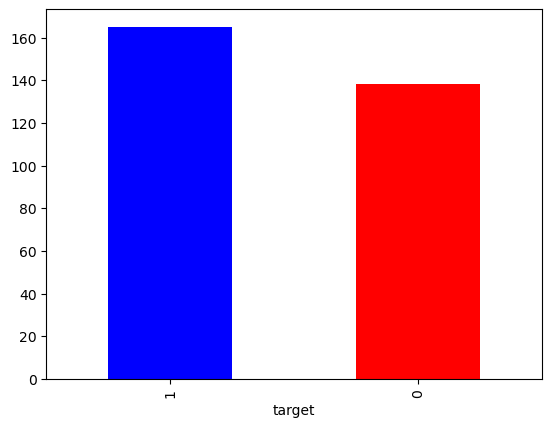

In [4]:
#plot out the number of value there are on bar chart
df["target"].value_counts().plot(kind="bar", color=["blue", "red"])
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Finding patterns - compare sex with target attribute

In [31]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


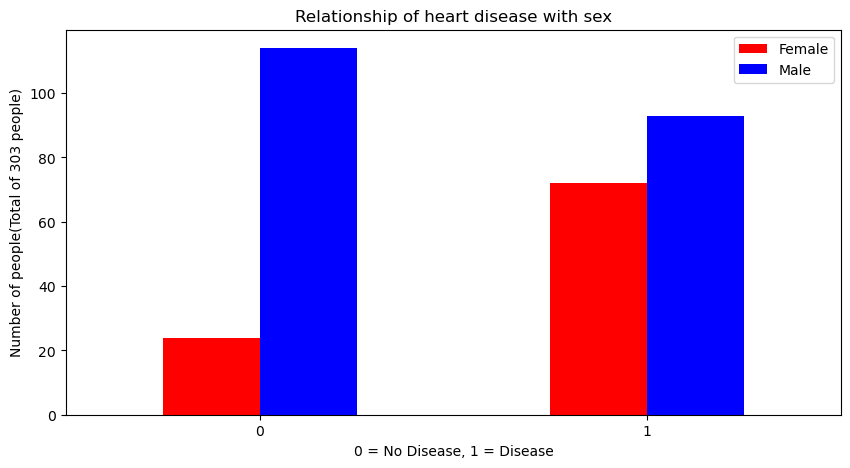

In [54]:
#create plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 5), color =["red", "blue"]);
plt.title("Relationship of heart disease with sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of people(Total of 303 people)")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

## Age vs heart disease

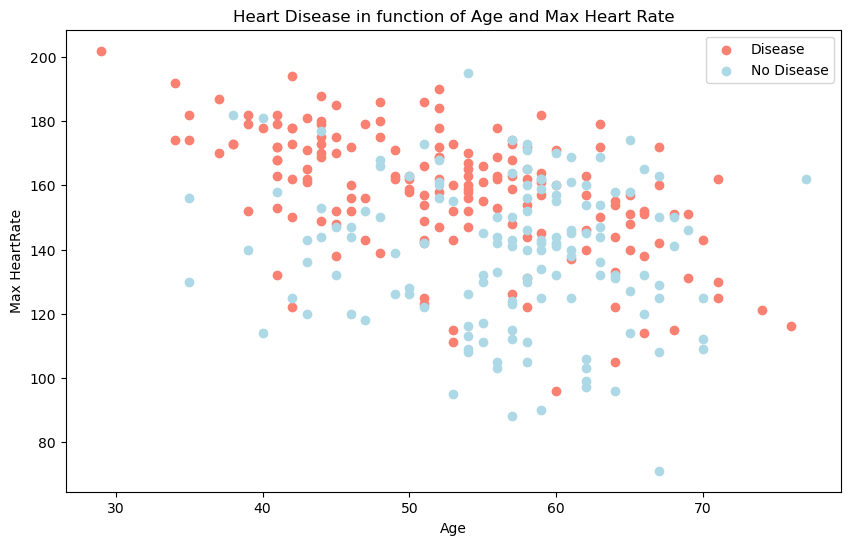

In [6]:
plt.figure(figsize=(10, 6));

plt.scatter(df.age[df.target == 1], df.thalach[df.target==1], c="salmon");
# pattern spotted: younger the person, faster the heart beat
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max HeartRate")
plt.legend(["Disease", "No Disease"]);
plt.show()

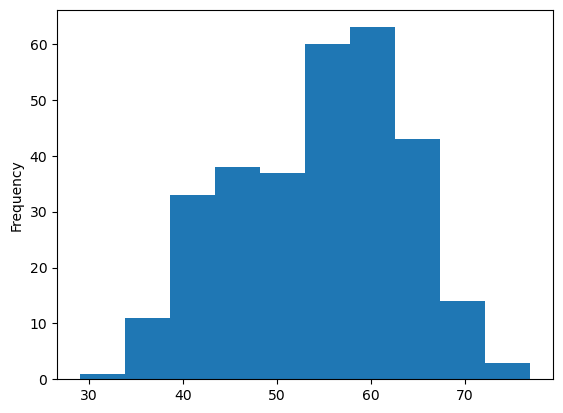

In [55]:
#check distribution of age
df.age.plot.hist();
plt.show()

In [58]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


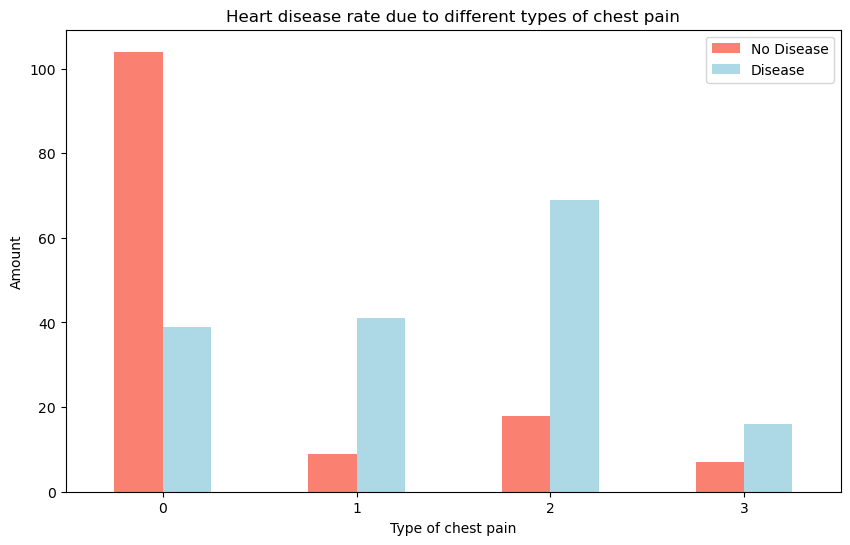

In [7]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart disease rate due to different types of chest pain");
plt.xlabel("Type of chest pain");
plt.ylabel("Amount");
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);
plt.show()                                                           

building correlation matrix(how they correlate to each other)

In [62]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


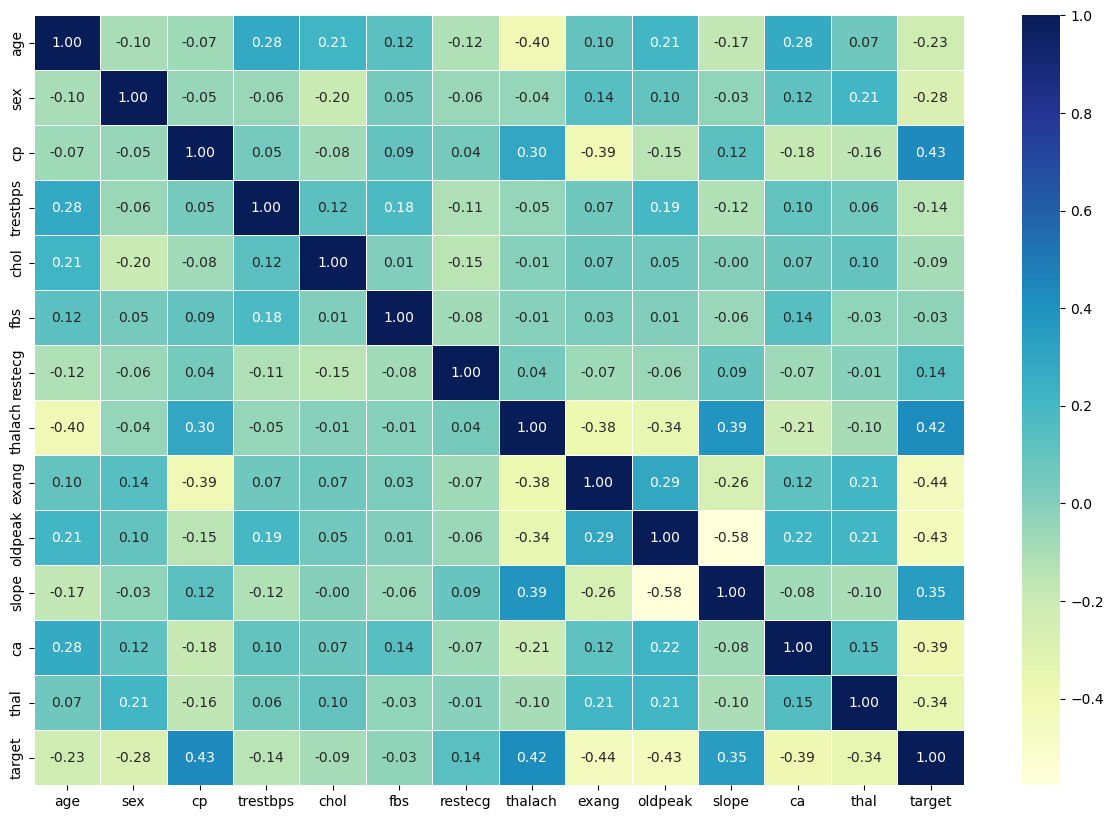

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10));
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap ="YlGnBu");
plt.show()

# Modeling

In [9]:
X = df.drop("target", axis=1)
y = df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [11]:
np.random.seed(42)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2)

In [12]:
models = {"Logistic Regression": LogisticRegression(), "KNN" : KNeighborsClassifier(), "Random Forest": RandomForestClassifier()}

def fit_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [13]:
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\FiercePC\Desktop\Heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

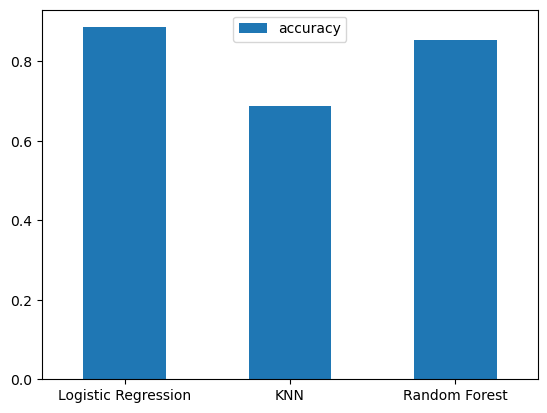

In [14]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"]);
model_compare.T.plot.bar();
plt.xticks(rotation=0);
plt.show()

## Hyperparameter tuning by hand on KNN

In [15]:
train_scores = []
test_scores = []

neighbours = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

print (f"Train_score: {train_scores}")
print(f"Test_score: {test_scores}")

Train_score: [1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058]
Test_score: [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327]


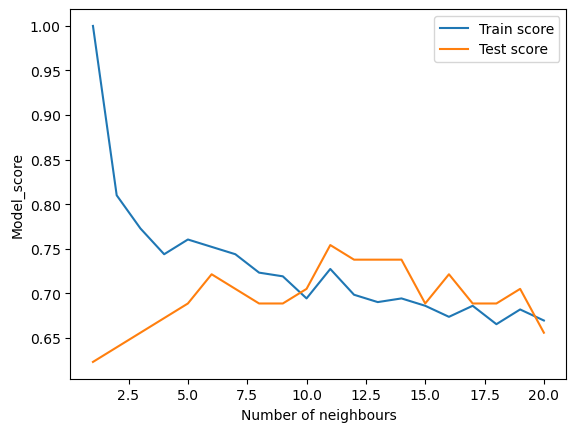

Max KNN test data: 75.41%
(242, 13)
(61, 13)


In [16]:
plt.plot(neighbours, train_scores, label="Train score");
plt.plot(neighbours, test_scores, label="Test score");
plt.xlabel("Number of neighbours");
plt.ylabel("Model_score");
plt.legend();
plt.show()

print (f"Max KNN test data: {max(test_scores)*100:.2f}%")
print (X_train.shape)
print (X_test.shape)

## Hyperparameter tuning with RandomiseSearchCV

In [17]:
#logistic regression hyperparameter
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#random forest classifier hyperparameter
rf_grid = {"n_estimators": (10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

#Tune logistic regression
np.random.seed(42)

rs_log_grid = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

rs_log_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [18]:
rs_log_grid.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [19]:
rs_log_grid.score(X_test, y_test)

0.8852459016393442

In [20]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train, y_train)
                           

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': (10, ...)}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [50]:
rs_rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(17),
 'max_depth': 10}

In [53]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

In [27]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

In [28]:
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [29]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [30]:
gs_log_reg.score(X_test, y_test)
# logistic regression is the best model for predicting heart disease

0.8852459016393442

## Evaluating the model

Always compare prediction with ground truth

In [31]:
y_preds = gs_log_reg.predict(X_test)

In [23]:
y_preds

NameError: name 'y_preds' is not defined

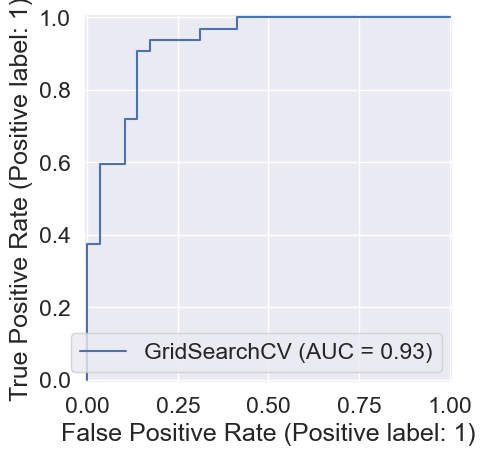

In [32]:
#plot roc_curve
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);
plt.show()

In [33]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

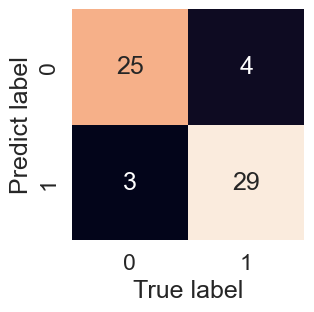

In [34]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                   cbar=False);

    plt.xlabel("True label")
    plt.ylabel("Predict label")
    plt.show()

plot_conf_mat(y_test, y_preds)

"classification_report(y_test, y_preds)" is not good enough as it only shows the report of only one portion(last 20%) out of the data

Solution: calculate precision, recall and f1_score using cross-validation

In [36]:
#{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}
clf = LogisticRegression(C=0.20433597178569418, solver = "liblinear")

from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [37]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

In [38]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [39]:
cv_pre = cross_val_score(clf, X, y, scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

np.float64(0.8207936507936507)

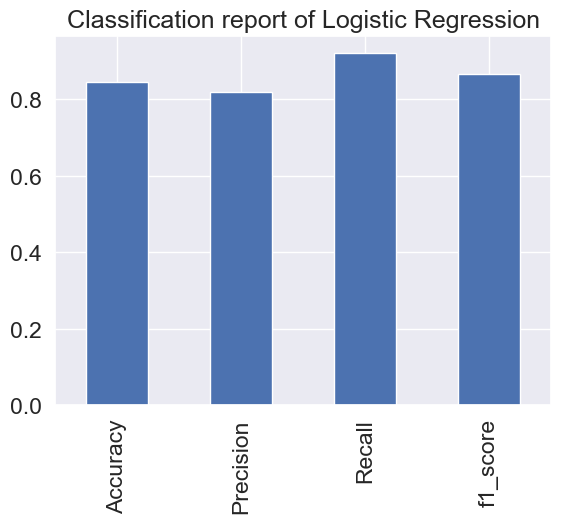

In [40]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                        "Precision": cv_pre,
                        "Recall": cv_recall,
                        "f1_score": cv_f1}, index=[0])

cv_metrics.T.plot.bar(title="Classification report of Logistic Regression", legend=False)
plt.show()

## Feature Importance

Which feature(from the dataset) contributed the most to the outcome of model and how did they contribute?
* Ways to find feature importance differs on different models

In [41]:
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")

clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.20433597178569418
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [42]:
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [43]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.003167280425913024),
 'sex': np.float64(-0.8604465017405314),
 'cp': np.float64(0.6606704375815468),
 'trestbps': np.float64(-0.011569931400895204),
 'chol': np.float64(-0.0016637445504085657),
 'fbs': np.float64(0.04386110683275644),
 'restecg': np.float64(0.3127584216723769),
 'thalach': np.float64(0.024593614040407018),
 'exang': np.float64(-0.6041307979006147),
 'oldpeak': np.float64(-0.5686280785492623),
 'slope': np.float64(0.45051628777983527),
 'ca': np.float64(-0.6360989513753182),
 'thal': np.float64(-0.6766337783287578)}

In [45]:
feature_df = pd.DataFrame(feature_dict, index=[0]);
feature_df.T.plot.bar(title="Feature Importance", legend=False);
plt.plot()

[]

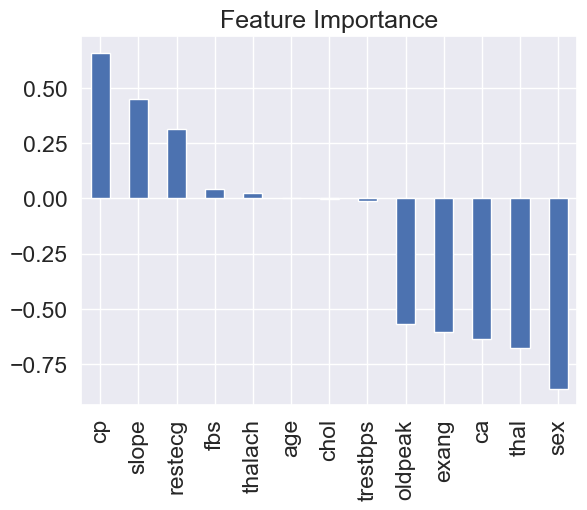

In [47]:
feature_df.T.sort_values(0, ascending=False).plot.bar(title="Feature Importance", legend=False);
plt.show()

In [48]:
pd.crosstab(df["sex"], df["cp"])

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


In [51]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


## Experimentation